In [1]:
import sys
sys.path.append("../..")
import module.components.CONST as CONST
from module.base.network import Network
from module.simulation.meanfield import MeanField
from module.simulation.quick_meanfield2 import QuickMeanField2
import numpy as np
import matplotlib.pyplot as plt
import timeit
import scipy.odr

## Measure Tunnel Rate Runtime

In [5]:
ns = range(2, 30)
sizes = [n**2 for n in ns]
nets = [Network(n, n, 1, []) for n in ns]

ns_flat = range(2, 900)
sizes_flat = ns_flat
nets_flat = [Network(n, 1, 1, []) for n in ns_flat]

In [6]:
def measure_calc_rate(net):
    net.calc_rate_island(np.random.randn(net.N_particles), 0, 1)

In [7]:
rate_times = [timeit.timeit(lambda: measure_calc_rate(net), number = 200) for net in nets]
rate_times_flat = [timeit.timeit(lambda: measure_calc_rate(net), number = 200) for net in nets_flat]

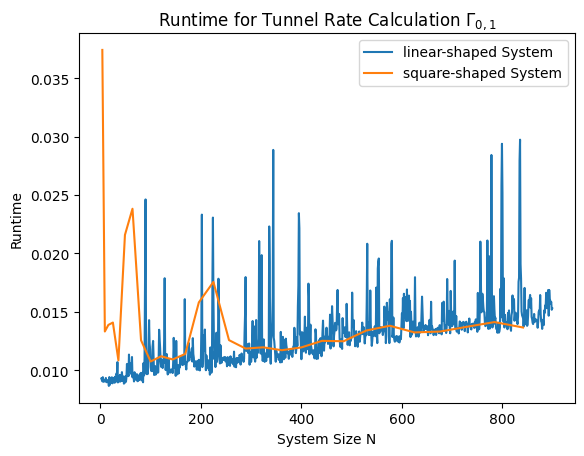

In [9]:
plt.plot(sizes_flat, rate_times_flat, label = "linear-shaped System")
plt.plot(sizes, rate_times, label = "square-shaped System")
plt.xlabel("System Size N")
plt.ylabel("Runtime")
plt.title("Runtime for Tunnel Rate Calculation $\\Gamma_{0,1}$")
plt.legend()
plt.savefig("../../output/runtime/c_tunnel_rate.pdf")

In [25]:
## result: Tunnel Rate scales linearly with System Size (as expected)

### Measure Calc Expected Island Rates in MF1

In [10]:
ns = range(2, 900, 10)
nets = [Network(n, 1, 1, []) for n in ns]
mfs = [MeanField(net) for net in nets]

In [11]:
def measure_calc_expec(mf):
    mf.calc_expected_island_rates(np.random.randn(mf.network.N_particles))

In [12]:
expec_times = [timeit.timeit(lambda: measure_calc_expec(mf), number = 1) for mf in mfs]

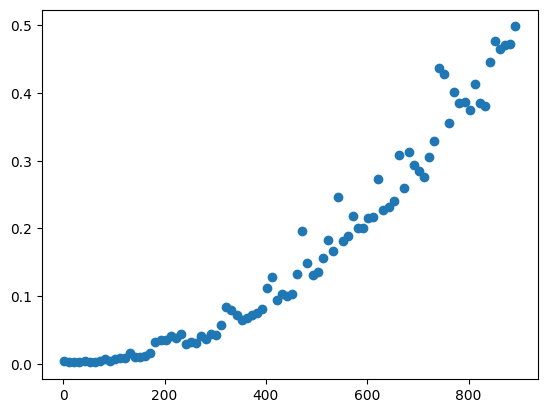

In [13]:
plt.scatter(ns, expec_times)
# plt.yscale("log")
# plt.xscale("log")

## Measure Integration Step Runtime

In [2]:
ns = range(1, 1300, 30)
sizes = np.array([n for n in ns])
nets = [Network(n, 1, 1, []) for n in ns]
for net in nets:
    #net.set_voltage_config([0.1, -0.1], 0)
    pass

In [3]:
mfs = [MeanField(net) for net in nets]
qmf2s = [QuickMeanField2(net) for net in nets]

In [4]:
def measure_MF1(mf):
    mf.numeric_integration_solve(N = 1)

def measure_QMF2(qmf2):
    qmf2.numeric_integration_solve(N = 1)

In [5]:
mf_times = [timeit.timeit(lambda: measure_MF1(mf), number = 3) for mf in mfs]
qmf2_times = [timeit.timeit(lambda: measure_QMF2(qmf2), number = 1) for qmf2 in qmf2s]

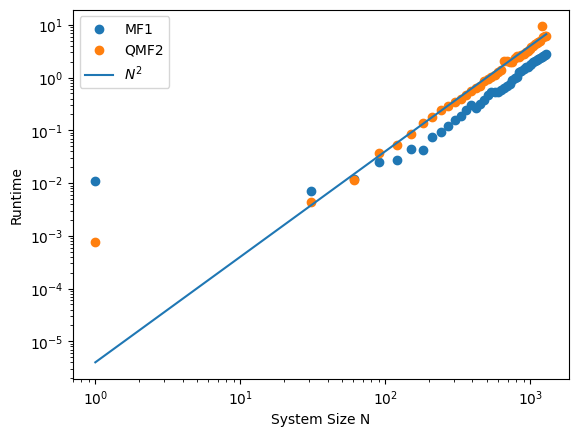

In [6]:
plt.scatter(sizes, mf_times, label = "MF1")
plt.scatter(sizes, qmf2_times, label = "QMF2")
plt.plot(sizes, sizes**2*4e-6, label = "$N^2$")

plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel("System Size N")
plt.ylabel("Runtime")

plt.savefig("../../output/runtime/c_time_step.pdf")

In [84]:
## Quadratische Komplexität, wie erwartet